In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 274 kB 12.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=dc96e20310105097da8ee3cf63c1f9b606556d3d8940a17acab5c1fbfd2a80e3
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.10.0+cu111 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.10")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 28.6 MB/s 
     |████████████████████████████████| 145 kB 12.4 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 130 kB 48.5 MB/s 
     |████████████████████████████████| 74 kB 3.6 MB/s 
     |████████████████████████████████| 843 kB 49.2 MB/s 
     |████████████████████████████████| 748 kB 49.6 MB/s 
     |████████████████████████████████| 112 kB 51.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220212-py3-none-any.whl size=61216 sha256=0b4527322ea937da3c6b503228903aa48e937a1b89b973f69d4df669714dddbd
  Stored in directory: /root/.cache/pip/wheels/92/43/75/238d2a5d897274799f92b8938f3cd807a3ccd3c8f37c0a4725
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=36be07399a8d597cf318aabf3fa0feac54592ae84a8e2afb64e446a934ac

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.10.0+cu111 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
%cd /content/drive/MyDrive/card detection detectron2

/content/drive/MyDrive/card detection detectron2


In [ ]:
!pwd

/content/drive/MyDrive/card detection detectron2


In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("custom_cards_detector2", {}, "/content/drive/MyDrive/card detection detectron2/data_detectron2/output.json", "/content/drive/MyDrive/card detection detectron2/data_detectron2/train")

AssertionError: ignored

In [ ]:
from detectron2.data.datasets import register_coco_instances

sample_metadata = MetadataCatalog.get("custom_cards_detector2")         
dataset_dicts = DatasetCatalog.get("custom_cards_detector2")            

WARNING [02/13 17:13:57 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/13 17:13:57 d2.data.datasets.coco]: Loaded 296 images in COCO format from /content/drive/MyDrive/card detection detectron2/data_detectron2/output.json


In [ ]:
sample_metadata

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/card detection detectron2/data_detectron2/train', json_file='/content/drive/MyDrive/card detection detectron2/data_detectron2/output.json', name='custom_cards_detector2', thing_classes=['aeroplane', 'jack', 'king', 'nine', 'queen', 'ten', 'ace'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6})

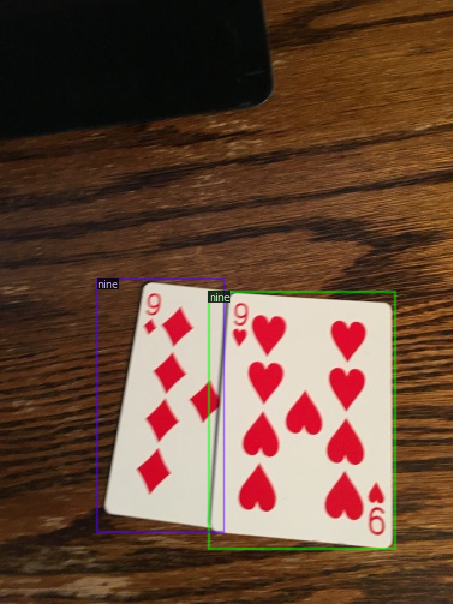

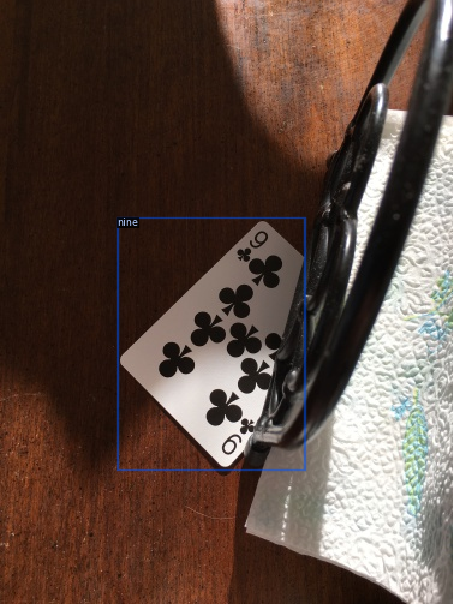

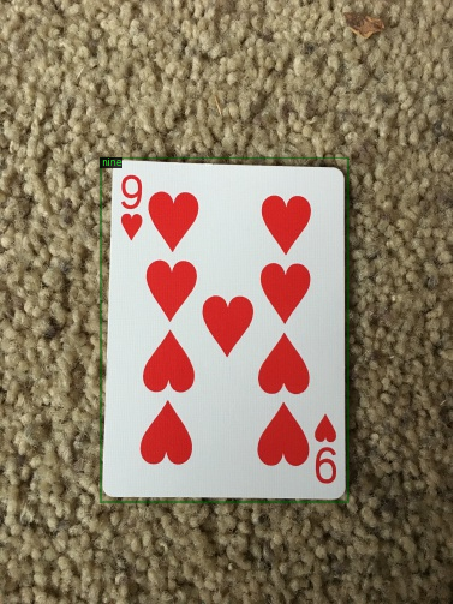

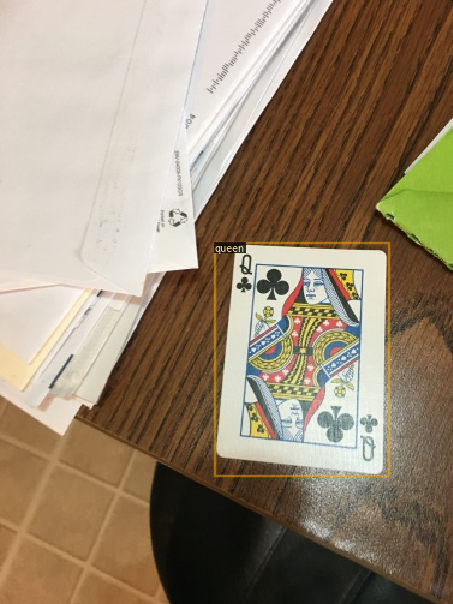

In [ ]:
import random

for d in random.sample(dataset_dicts, 4):
  img = cv2.imread(d["file_name"])
  visualizer = Visualizer (img[:, :, ::-1], metadata=sample_metadata, scale=1.2)
  vis = visualizer.draw_dataset_dict(d)
  cv2_imshow(vis.get_image() [:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("custom_cards_detector2",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 6020    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # 3 classes (data, fig, hazelnut)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[02/13 17:30:42 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


[02/13 17:31:09 d2.utils.events]:  eta: 0:00:00  iter: 6019  total_loss: 0.06656  loss_cls: 0.01062  loss_box_reg: 0.05113  loss_rpn_cls: 0.0001336  loss_rpn_loc: 0.001682  time: 1.2982  data_time: 0.0204  lr: 0.0025  max_mem: 2798M
[02/13 17:31:09 d2.engine.hooks]: Overall training speed: 18 iterations in 0:00:23 (1.2982 s / it)
[02/13 17:31:09 d2.engine.hooks]: Total training time: 0:00:24 (0:00:00 on hooks)


In [ ]:
"""from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()"""

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("custom_cards_detector2", )
predictor = DefaultPredictor(cfg)

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


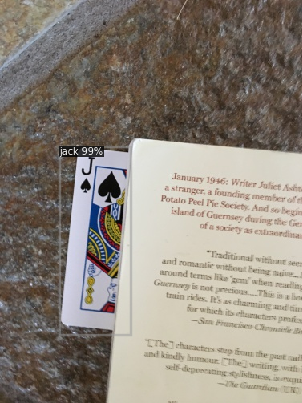

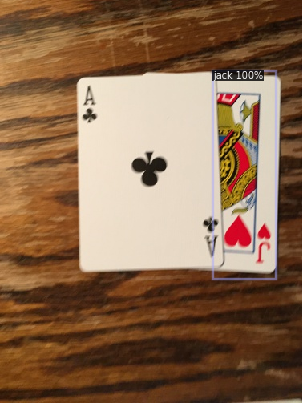

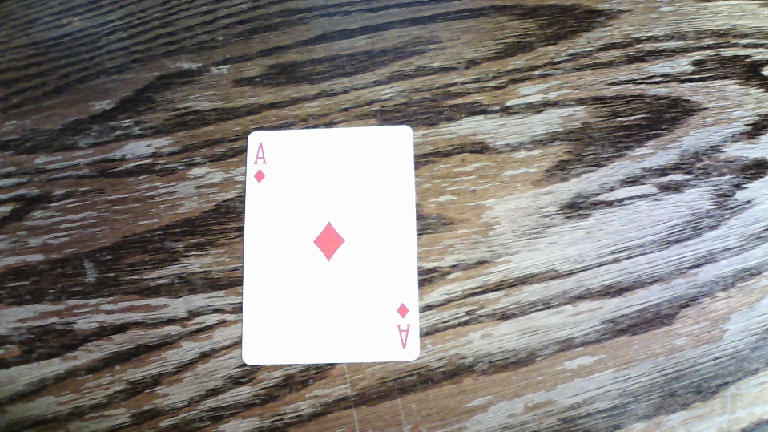

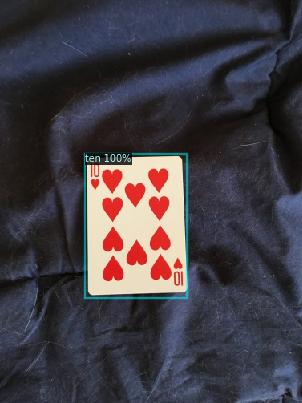

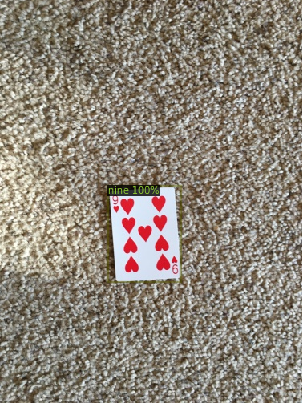

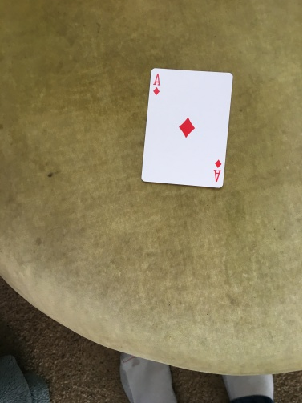

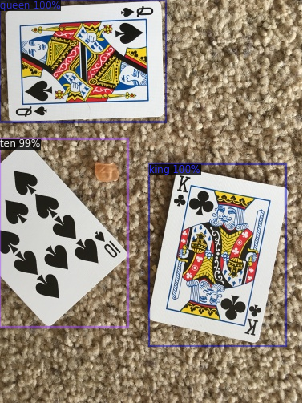

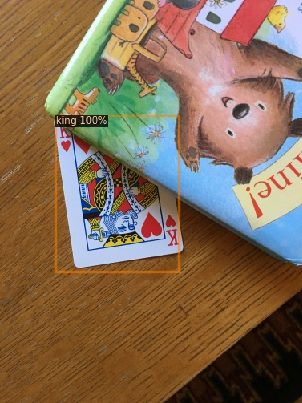

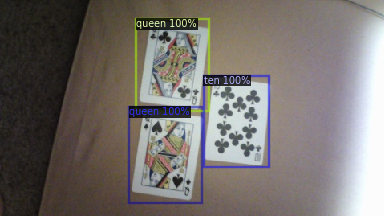

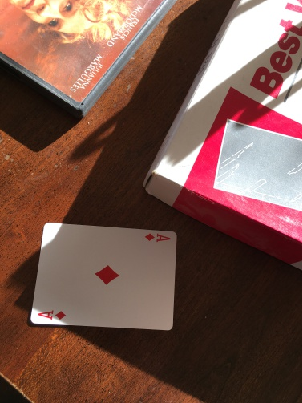

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 10):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
f=open('config.yml','w')
f.write(cfg.dump())
f.close()

#Evaluation

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator ("custom_cards_detector2", output_dir="./output2")

val_loader = build_detection_test_loader(cfg, "custom_cards_detector2") 
print(inference_on_dataset (predictor.model, val_loader, evaluator))

WARNING [02/13 17:32:21 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/13 17:32:21 d2.data.datasets.coco]: Loaded 296 images in COCO format from /content/drive/MyDrive/card detection detectron2/data_detectron2/output.json
[02/13 17:32:21 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/13 17:32:21 d2.data.common]: Serializing 296 elements to byte tensors and concatenating them all ...
[02/13 17:32:21 d2.data.common]: Serialized dataset takes 0.09 MiB
[02/13 17:32:21 d2.evaluation.evaluator]: Start inference on 296 batches


/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


[02/13 17:32:26 d2.evaluation.evaluator]: Inference done 11/296. Dataloading: 0.0017 s/iter. Inference: 0.3587 s/iter. Eval: 0.0003 s/iter. Total: 0.3607 s/iter. ETA=0:01:42
[02/13 17:32:31 d2.evaluation.evaluator]: Inference done 25/296. Dataloading: 0.0023 s/iter. Inference: 0.3603 s/iter. Eval: 0.0003 s/iter. Total: 0.3630 s/iter. ETA=0:01:38
[02/13 17:32:36 d2.evaluation.evaluator]: Inference done 39/296. Dataloading: 0.0023 s/iter. Inference: 0.3603 s/iter. Eval: 0.0003 s/iter. Total: 0.3630 s/iter. ETA=0:01:33
[02/13 17:32:41 d2.evaluation.evaluator]: Inference done 53/296. Dataloading: 0.0024 s/iter. Inference: 0.3594 s/iter. Eval: 0.0003 s/iter. Total: 0.3624 s/iter. ETA=0:01:28
[02/13 17:32:46 d2.evaluation.evaluator]: Inference done 67/296. Dataloading: 0.0023 s/iter. Inference: 0.3593 s/iter. Eval: 0.0003 s/iter. Total: 0.3621 s/iter. ETA=0:01:22
[02/13 17:32:51 d2.evaluation.evaluator]: Inference done 81/296. Dataloading: 0.0024 s/iter. Inference: 0.3595 s/iter. Eval: 0.000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
